/Users/umutduygu/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,
/Users/umutduygu/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


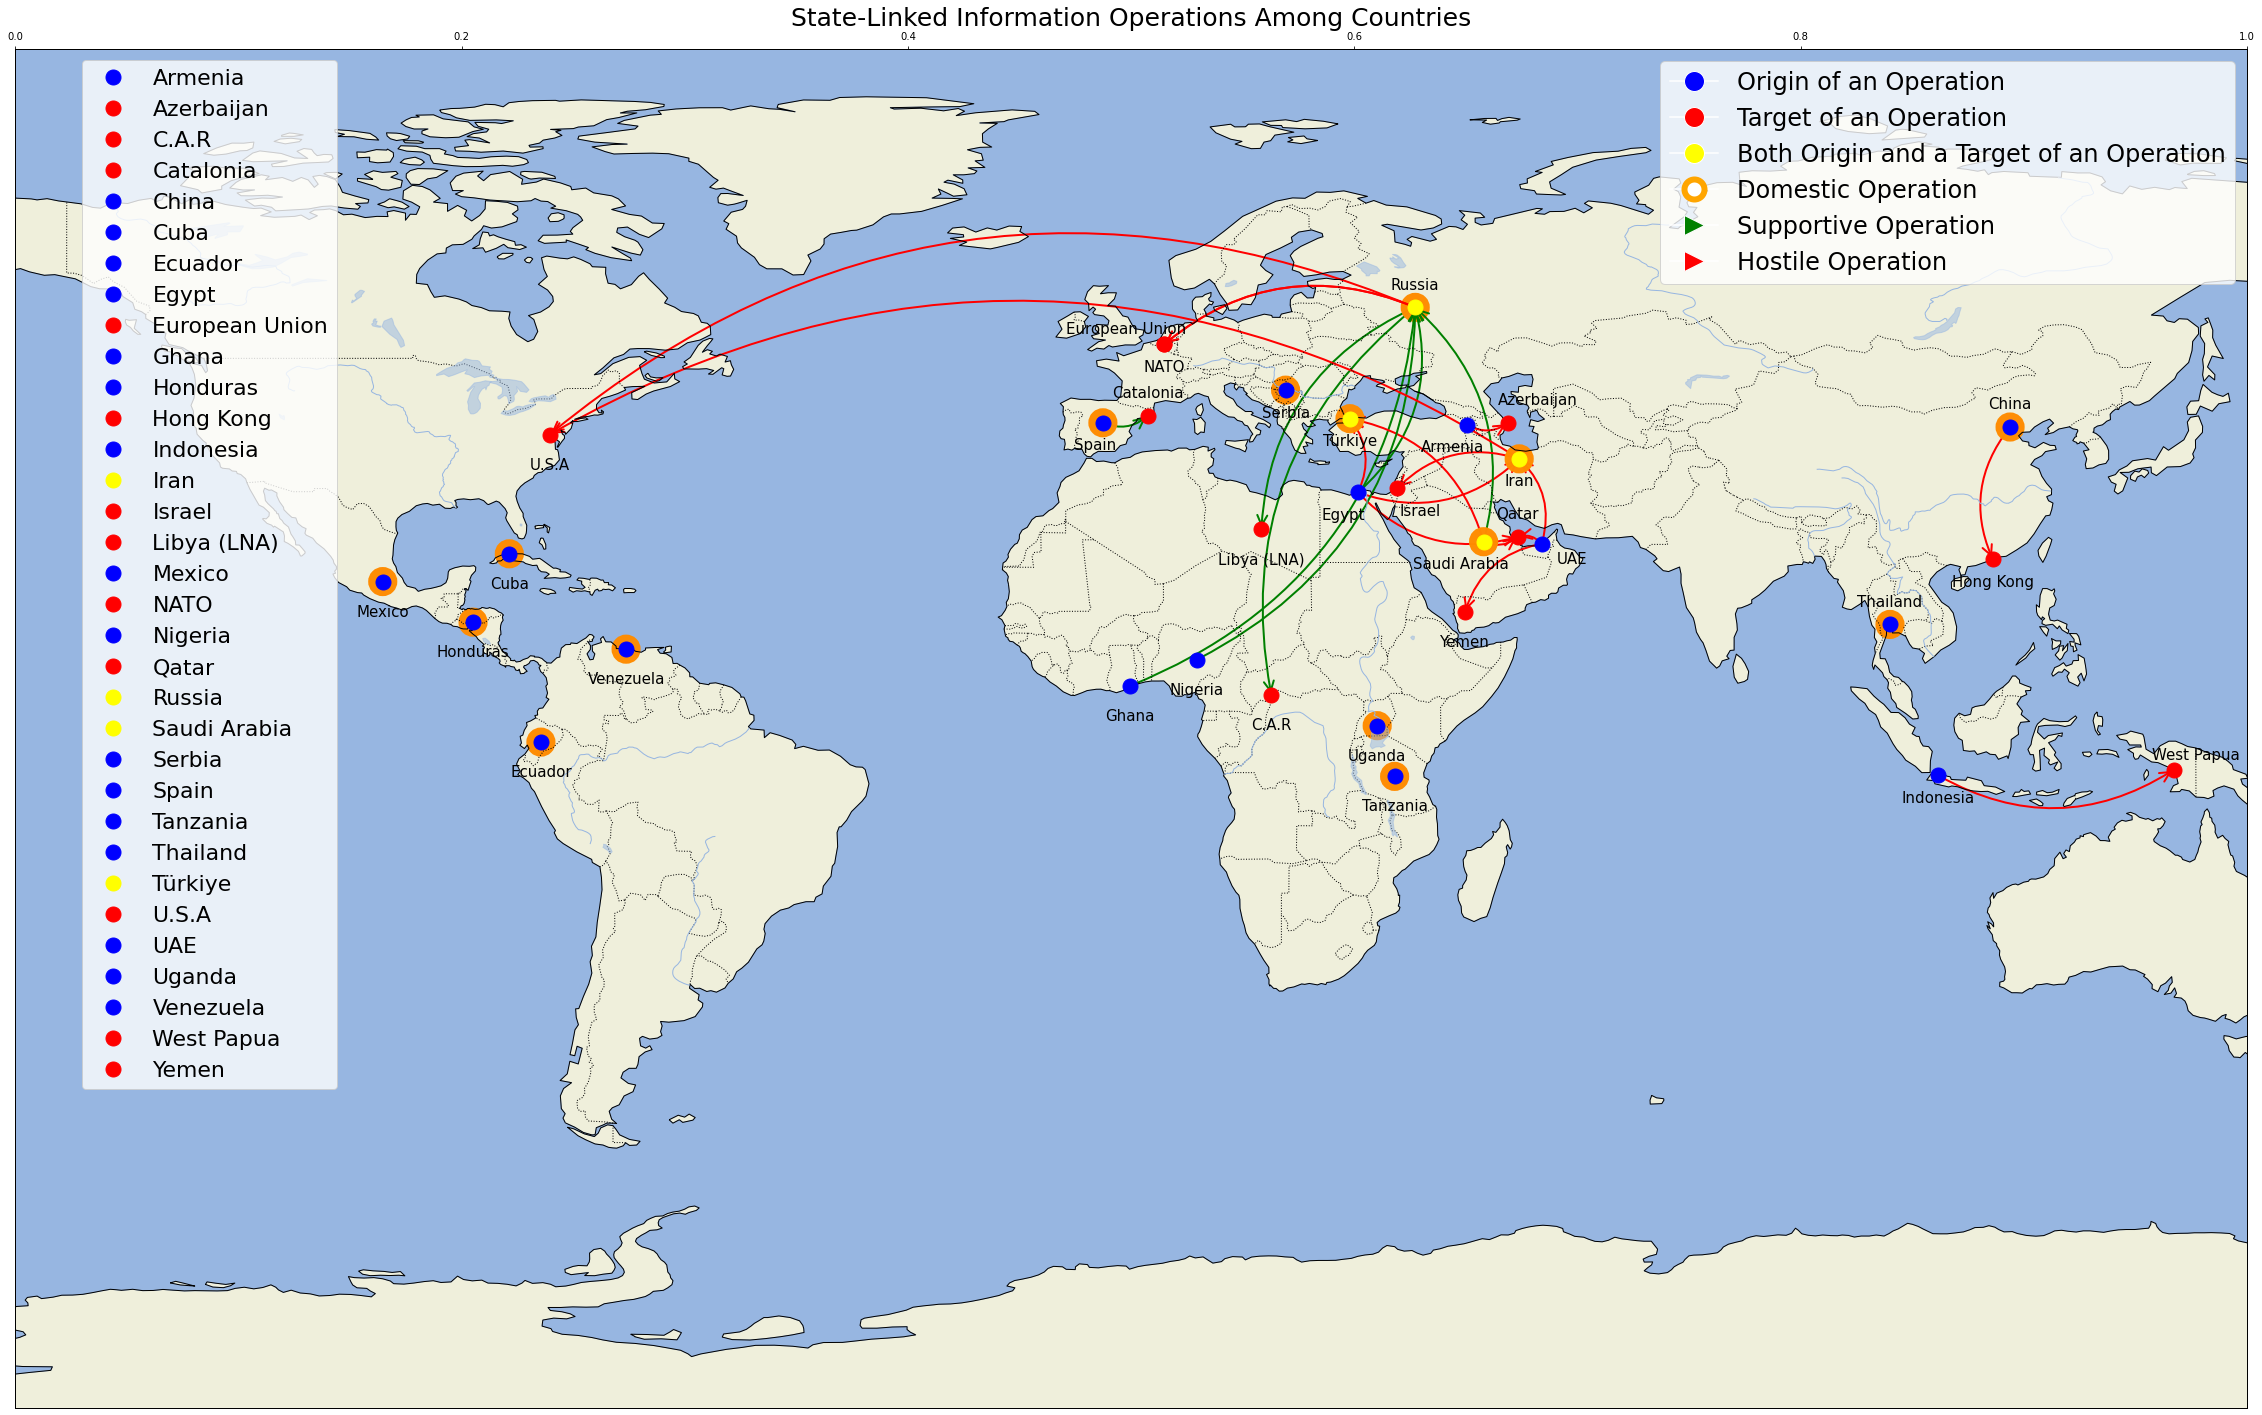

In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import FancyArrowPatch, ConnectionStyle
import matplotlib.path as mpath
import matplotlib.lines as mlines


# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for origin and target countries
G.add_node("Russia")
G.add_node("U.S.A")
G.add_node("Ghana")
G.add_node("Egypt")
G.add_node("UAE")
G.add_node("Saudi Arabia")
G.add_node("Mexico")
G.add_node("Ecuador")
G.add_node("Venezuela")
G.add_node("China")
G.add_node("Nigeria")
G.add_node("Honduras")
G.add_node("Indonesia")
G.add_node("Serbia")
G.add_node("Türkiye")
G.add_node("Cuba")
G.add_node("Thailand")
G.add_node("Iran")
G.add_node("Armenia")
G.add_node("Tanzania")
G.add_node("Uganda")
G.add_node("Azerbaijan")
G.add_node("Yemen")
G.add_node("C.A.R")
G.add_node("Israel")
G.add_node("Hong Kong")
G.add_node("Qatar")
G.add_node("West Papua")
G.add_node("Catalonia")
G.add_node("Spain")
G.add_node("Libya (LNA)")
G.add_node("European Union")
G.add_node("NATO")

# Add edges for attitudes
G.add_edge("Russia", "U.S.A", attitude="Negative")
G.add_edge("Ghana", "Russia", attitude="Positive")
G.add_edge("Egypt", "Russia", attitude="Positive")
G.add_edge("Saudi Arabia", "Russia", attitude="Positive")
G.add_edge("Russia", "C.A.R", attitude="Positive")
G.add_edge("Russia", "Libya (LNA)", attitude="Positive")
G.add_edge("Iran", "U.S.A", attitude="Negative")
G.add_edge("Iran", "Israel", attitude="Negative")
G.add_edge("China", "Hong Kong", attitude="Negative")
G.add_edge("Indonesia", "West Papua", attitude="Negative")
G.add_edge("Spain", "Catalonia", attitude="Positive")
G.add_edge("UAE", "Yemen", attitude="Negative")
G.add_edge("Egypt", "Qatar", attitude="Negative")
G.add_edge("Egypt", "Türkiye", attitude="Negative")
G.add_edge("UAE", "Qatar", attitude="Negative")
G.add_edge("Saudi Arabia", "Qatar", attitude="Negative")
G.add_edge("Saudi Arabia", "Türkiye", attitude="Negative")
G.add_edge("Nigeria", "Russia", attitude="Positive")
G.add_edge("Armenia", "Azerbaijan", attitude="Negative")
G.add_edge("Egypt", "Iran", attitude="Negative")
G.add_edge("UAE", "Iran", attitude="Negative")

# Self-loops
G.add_edge("China", "China", attitude="Negative")
G.add_edge("Thailand", "Thailand", attitude="Positive")
G.add_edge("China", "China", attitude="Positive")
G.add_edge("Iran", "Iran", attitude="Positive")
G.add_edge("Russia", "Russia", attitude="Positive")
G.add_edge("Uganda", "Uganda", attitude="Positive")
G.add_edge("Tanzania", "Tanzania", attitude="Negative")
G.add_edge("Türkiye", "Türkiye", attitude="Positive")
G.add_edge("Serbia", "Serbia", attitude="Positive")
G.add_edge("Spain", "Spain", attitude="Positive")
G.add_edge("Honduras", "Honduras", attitude="Positive")
G.add_edge("Mexico", "Mexico", attitude="Positive")
G.add_edge("Ecuador", "Ecuador", attitude="Negative")
G.add_edge("Venezuela", "Venezuela", attitude="Positive")
G.add_edge("Saudi Arabia", "Saudi Arabia", attitude="Positive")
G.add_edge("Cuba", "Cuba", attitude="Positive")


# Add edges for European Union and NATO
G.add_edge("Russia", "European Union", attitude="Negative")
G.add_edge("Russia", "NATO", attitude="Negative")


# Define positions for the nodes using longitude and latitude values
positions = {
    "Russia": (37.618423, 55.751244),                   # Moscow, Russia
    "U.S.A": (-77.036871, 38.907192),                     # Washington D.C., U.S.A
    "Ghana": (-0.186964, 5.603717),                     # Accra, Ghana
    "Egypt": (30.0444, 31.2357),                         # Cairo, Egypt
    "Saudi Arabia": (46.6753, 24.7136),                  # Riyadh, Saudi Arabia
    "Mexico": (-99.1332, 19.4326),                       # Mexico City, Mexico
    "Ecuador": (-78.1834, -1.8312),                      # Quito, Ecuador
    "Venezuela": (-66.9036, 10.4806),                    # Caracas, Venezuela
    "China": (116.4074, 39.9042),                        # Beijing, China
    "Nigeria": (8.675277, 9.081999),                     # Abuja, Nigeria
    "Honduras": (-87.1729, 14.0583),                     # Tegucigalpa, Honduras
    "Indonesia": (106.8456, -6.2088),                    # Jakarta, Indonesia
    "UAE": (54.3773, 24.4539),                           # Abu Dhabi, UAE
    "Serbia": (20.4489, 44.7866),                        # Belgrade, Serbia
    "Türkiye": (28.9784, 41.0082),                        # Istanbul, Türkiye
    "Cuba": (-82.3666, 23.1136),                         # Havana, Cuba
    "Thailand": (100.5018, 13.7563),                     # Bangkok, Thailand
    "Iran": (51.3890, 35.6892),                          # Tehran, Iran
    "Armenia": (44.4991, 40.1792),                       # Yerevan, Armenia
    "Tanzania": (34.8888, -6.3690),                      # Dodoma, Tanzania
    "Uganda": (32.5825, 0.3476),                         # Kampala, Uganda
    "Azerbaijan": (49.8671, 40.4093),                    # Baku, Azerbaijan
    "Yemen": (44.2067, 15.3520),                         # Sana'a, Yemen
    "C.A.R": (18.5736, 4.3612),        # Bangui, Central African Republic
    "Israel": (35.2137, 31.7683),                         # Jerusalem, Israel
    "Hong Kong": (114.1095, 22.3964),                     # Hong Kong, China
    "Qatar": (51.1839, 25.3548),                          # Doha, Qatar
    "West Papua": (138.0807, -5.4974),                    # Manokwari, West Papua
    "Catalonia": (2.1734, 41.3851),                       # Barcelona, Catalonia
    "Spain": (-3.7492, 40.4637),                          # Madrid, Spain
    "Libya (LNA)": (17.2280, 26.3351),                           # Tripoli, Libya
    "European Union": (4.3517, 50.8503),                   # Brussels, Belgium
    "NATO": (4.3517, 50.8503)                               # Brussels, Belgium
}

# Create a dictionary to map each country to a unique color/ Self-loop: Blue / Origin attack:Yellow
node_colors = {
    "Russia": "yellow",
    "U.S.A": "red",
    "Ghana": "blue",
    "Egypt": "blue",
    "Saudi Arabia": "yellow",
    "Mexico": "blue",
    "Ecuador": "blue",
    "Venezuela": "blue",
    "China": "blue",
    "Nigeria": "blue",
    "Honduras": "blue",
    "Indonesia": "blue",
    "UAE": "blue",
    "Serbia": "blue",
    "Türkiye": "yellow",
    "Cuba": "blue",
    "Thailand": "blue",
    "Iran": "yellow",
    "Armenia": "blue",
    "Tanzania": "blue",
    "Uganda": "blue",
    "Azerbaijan": "red",  
    "Yemen": "red",
    "C.A.R": "red",
    "Israel": "red",
    "Hong Kong": "red",
    "Qatar": "red",
    "West Papua": "red",
    "Catalonia": "red",
    "Spain": "blue",
    "Libya (LNA)": "red",
    "European Union": "red",
    "NATO": "red"
}

# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(40, 25))
ax = plt.axes(projection=ccrs.PlateCarree())



# Draw the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)



# Draw the graph edges
for edge in G.edges:
    origin = edge[0]
    target = edge[1]
    attitude = G.edges[edge]["attitude"]
    color = "red" if attitude == "Negative" else "green"
    
    
    if origin == target:
        # Self-loop circle
        circle = plt.Circle(positions[origin], radius=1, facecolor="orange", edgecolor="darkorange", alpha=5.0, linewidth=14, transform=ccrs.PlateCarree())
        ax.add_patch(circle)
    else:
        con = ConnectionStyle.Arc3(rad=0.3)
        arrow = FancyArrowPatch(positions[origin], positions[target], arrowstyle="->", mutation_scale=25, connectionstyle=con, color=color, linewidth=2)
        ax.add_patch(arrow)


    

sorted_countries = sorted(positions.keys())



label_offset = {
    "Russia": (0, 3),
    "U.S.A": (0, -4),
    "Ghana": (0, -4),
    "Egypt": (-2, -3),
    "Saudi Arabia": (-3, -3),
    "Mexico": (0, -4),
    "Ecuador": (0, -4),
    "Venezuela": (0, -4),
    "China": (0, 3),
    "Nigeria": (0, -4),
    "Honduras": (0, -4),
    "Indonesia": (0, -3),
    "UAE": (4, -2),
    "Serbia": (0, -3),
    "Türkiye": (0, -3),
    "Cuba": (0, -4),
    "Thailand": (0, 3),
    "Iran": (0, -3),
    "Armenia": (-2, -3),
    "Tanzania": (0, -4),
    "Uganda": (0, -4),
    "Azerbaijan": (4, 3),
    "Yemen": (0, -4),
    "C.A.R": (0, -4),
    "Israel": (3, -3),
    "Hong Kong": (0, -3),
    "Qatar": (0, 3),
    "West Papua": (3, 2),
    "Catalonia": (0, 3),
    "Spain": (-1, -3),
    "Libya (LNA)": (0, -4),
    "European Union": (-5, 2),
    "NATO": (0, -3)
}


for country in sorted_countries:
    pos = positions[country]
    color = node_colors[country]
    ax.plot(pos[0], pos[1], 'o', markersize=15, label=country, color=color, transform=ccrs.Geodetic())
    offset = label_offset[country]
    label = ax.text(pos[0] + offset[0], pos[1] + offset[1], country, transform=ccrs.Geodetic(), fontsize=15, ha='center', va='center')
    plt.draw()
    



# Set title and legend
ax.set_title("State-Linked Information Operations", fontsize=25)
ax.legend(loc='upper left', bbox_to_anchor=(0.025, 1.0), fontsize=22)



ax2 = ax.twiny()
legend_elements = [
    mlines.Line2D([], [], marker='o', color='w', label='Origin of an Operation', markerfacecolor='blue', markersize=20),
    mlines.Line2D([], [], marker='o', color='w', label='Target of an Operation', markerfacecolor='red', markersize=20),
    mlines.Line2D([], [], marker='o', color='w', label='Both Origin and a Target of an Operation', markerfacecolor='yellow', markersize=20),
    mlines.Line2D([], [], marker='o', color='w', label='Domestic Operation', markerfacecolor='white',
                  markeredgecolor='orange', markeredgewidth=6, markersize=20),
    mlines.Line2D([], [], marker='>', color='w', label='Supportive Operation', markerfacecolor='green', markersize=20),
    mlines.Line2D([], [], marker='>', color='w', label='Hostile Operation', markerfacecolor='red', markersize=20),
]


ax2.legend(handles=legend_elements, loc='upper right',fontsize=24)



# Set the extent of the map

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())


# Save and display the figure
plt.savefig("attitudes_map.pdf", dpi=300)
plt.show()

/Users/umutduygu/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


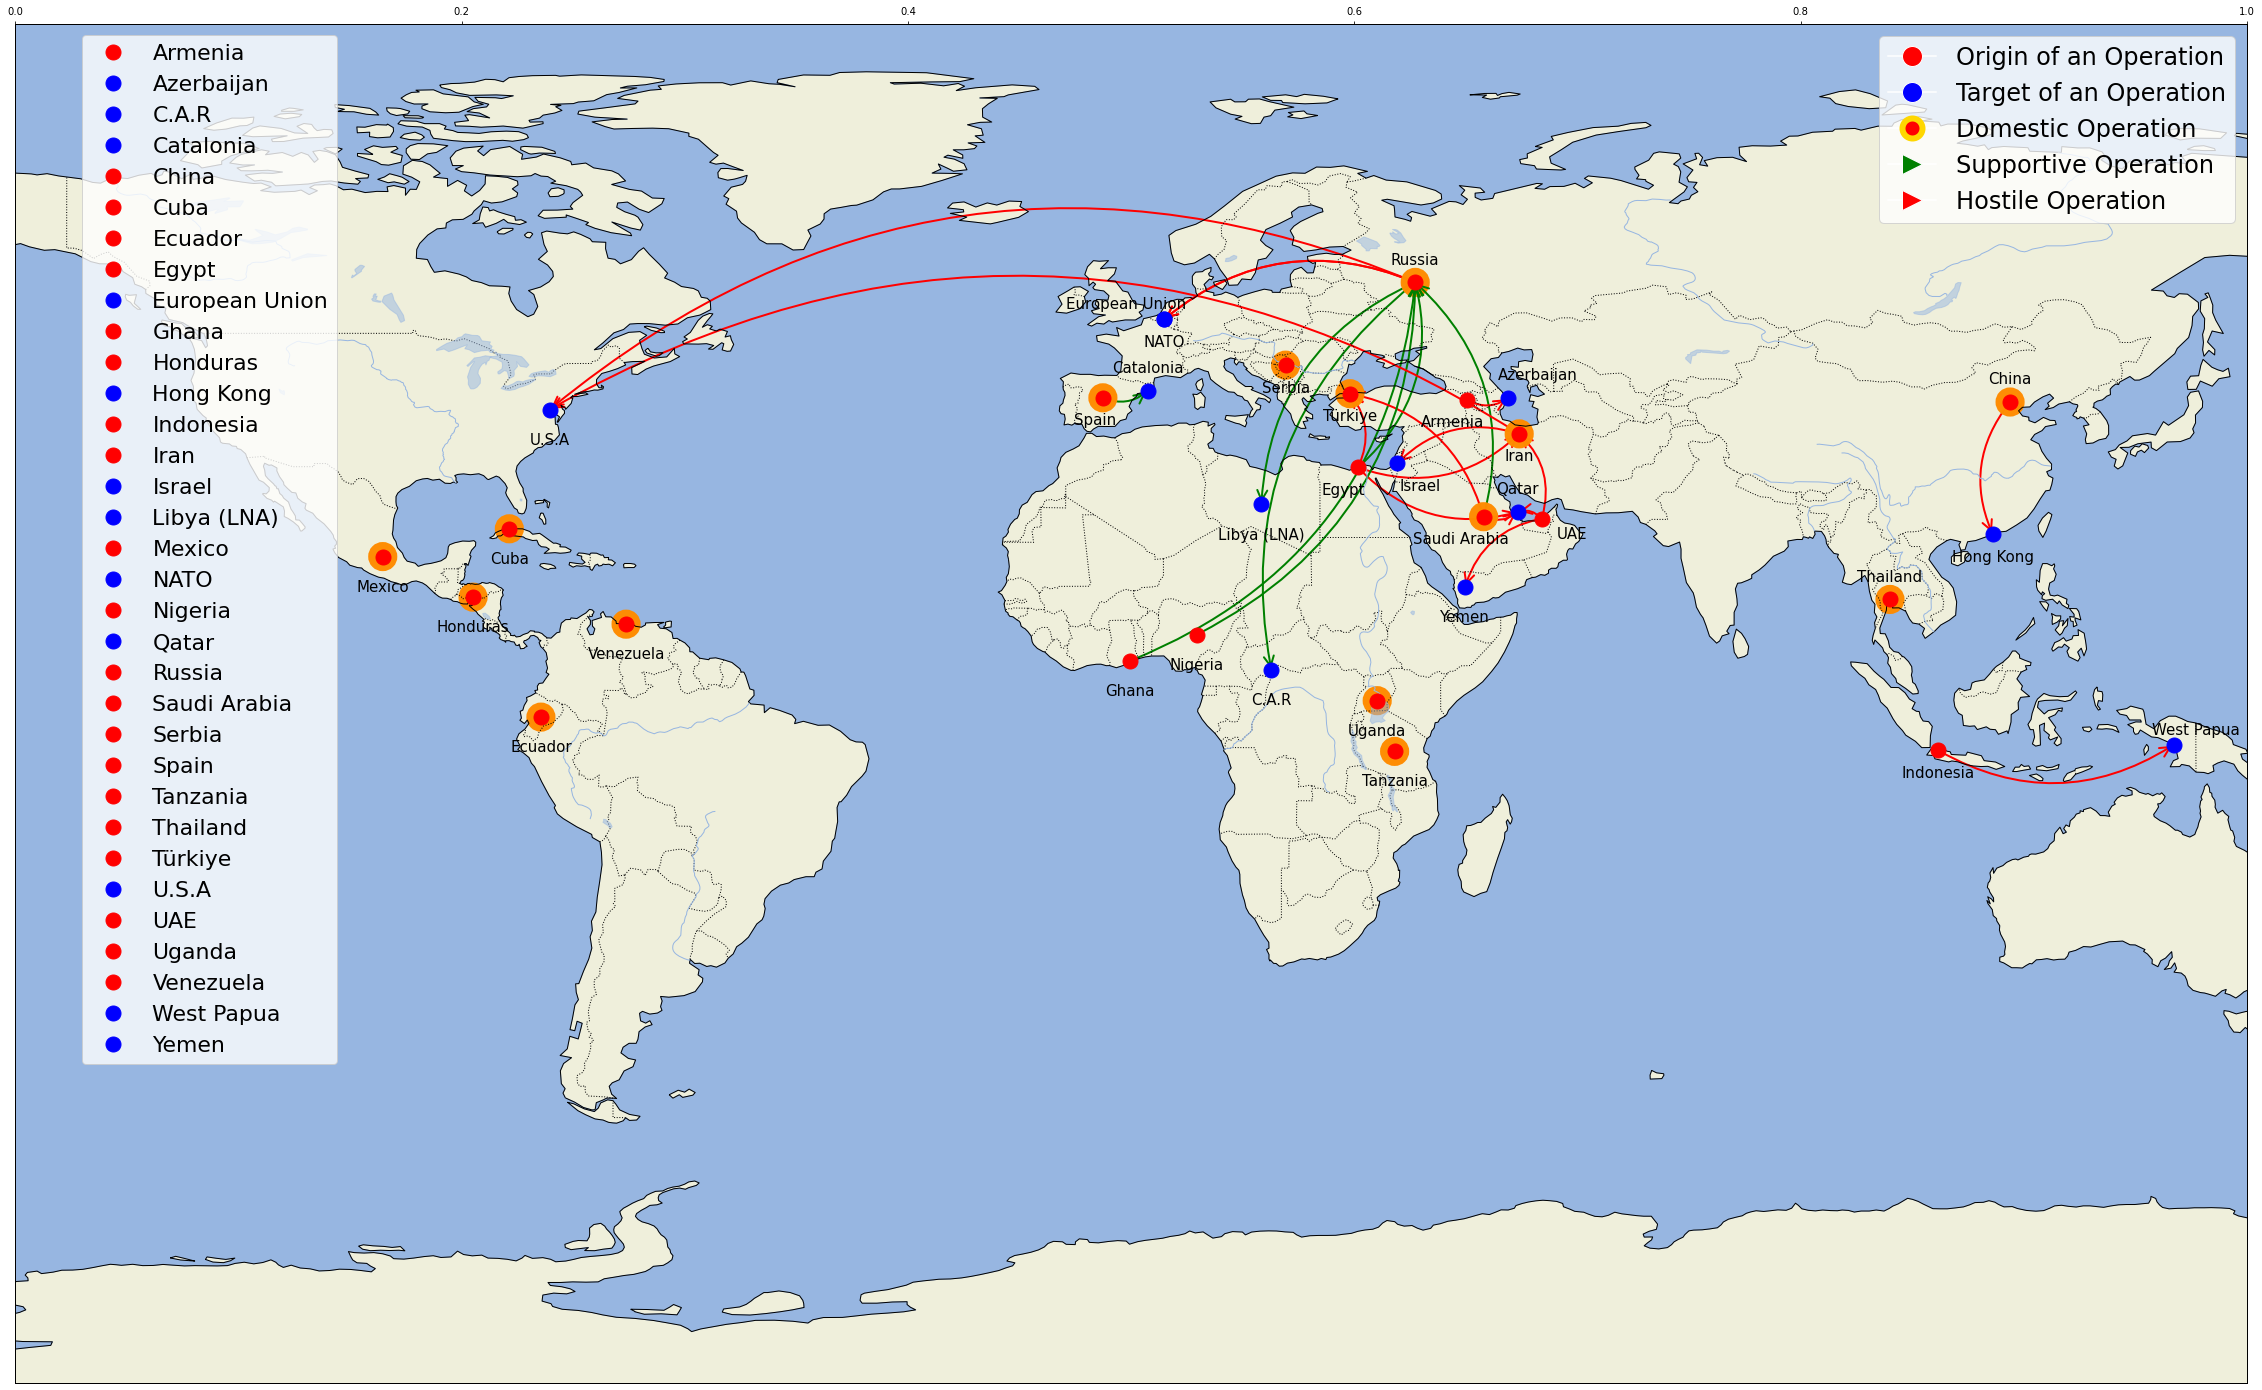

In [12]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import FancyArrowPatch, ConnectionStyle
import matplotlib.path as mpath
import matplotlib.lines as mlines


# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for origin and target countries
G.add_node("Russia")
G.add_node("U.S.A")
G.add_node("Ghana")
G.add_node("Egypt")
G.add_node("UAE")
G.add_node("Saudi Arabia")
G.add_node("Mexico")
G.add_node("Ecuador")
G.add_node("Venezuela")
G.add_node("China")
G.add_node("Nigeria")
G.add_node("Honduras")
G.add_node("Indonesia")
G.add_node("Serbia")
G.add_node("Türkiye")
G.add_node("Cuba")
G.add_node("Thailand")
G.add_node("Iran")
G.add_node("Armenia")
G.add_node("Tanzania")
G.add_node("Uganda")
G.add_node("Azerbaijan")
G.add_node("Yemen")
G.add_node("C.A.R")
G.add_node("Israel")
G.add_node("Hong Kong")
G.add_node("Qatar")
G.add_node("West Papua")
G.add_node("Catalonia")
G.add_node("Spain")
G.add_node("Libya (LNA)")
G.add_node("European Union")
G.add_node("NATO")


# Add edges for attitudes
G.add_edge("Russia", "U.S.A", attitude="Negative")
G.add_edge("Ghana", "Russia", attitude="Positive")
G.add_edge("Egypt", "Russia", attitude="Positive")
G.add_edge("Saudi Arabia", "Russia", attitude="Positive")
G.add_edge("Russia", "C.A.R", attitude="Positive")
G.add_edge("Russia", "Libya (LNA)", attitude="Positive")
G.add_edge("Iran", "U.S.A", attitude="Negative")
G.add_edge("Iran", "Israel", attitude="Negative")
G.add_edge("China", "Hong Kong", attitude="Negative")
G.add_edge("Indonesia", "West Papua", attitude="Negative")
G.add_edge("Spain", "Catalonia", attitude="Positive")
G.add_edge("UAE", "Yemen", attitude="Negative")
G.add_edge("Egypt", "Qatar", attitude="Negative")
G.add_edge("Egypt", "Türkiye", attitude="Negative")
G.add_edge("UAE", "Qatar", attitude="Negative")
G.add_edge("Saudi Arabia", "Qatar", attitude="Negative")
G.add_edge("Saudi Arabia", "Türkiye", attitude="Negative")
G.add_edge("Nigeria", "Russia", attitude="Positive")
G.add_edge("Armenia", "Azerbaijan", attitude="Negative")
G.add_edge("Egypt", "Iran", attitude="Negative")
G.add_edge("UAE", "Iran", attitude="Negative")
# Add edges for European Union and NATO
G.add_edge("Russia", "European Union", attitude="Negative")
G.add_edge("Russia", "NATO", attitude="Negative")



# Self-loops
G.add_edge("China", "China", attitude="Negative")
G.add_edge("Thailand", "Thailand", attitude="Positive")
G.add_edge("China", "China", attitude="Positive")
G.add_edge("Iran", "Iran", attitude="Positive")
G.add_edge("Russia", "Russia", attitude="Positive")
G.add_edge("Uganda", "Uganda", attitude="Positive")
G.add_edge("Tanzania", "Tanzania", attitude="Negative")
G.add_edge("Türkiye", "Türkiye", attitude="Positive")
G.add_edge("Serbia", "Serbia", attitude="Positive")
G.add_edge("Spain", "Spain", attitude="Positive")
G.add_edge("Honduras", "Honduras", attitude="Positive")
G.add_edge("Mexico", "Mexico", attitude="Positive")
G.add_edge("Ecuador", "Ecuador", attitude="Negative")
G.add_edge("Venezuela", "Venezuela", attitude="Positive")
G.add_edge("Saudi Arabia", "Saudi Arabia", attitude="Positive")
G.add_edge("Cuba", "Cuba", attitude="Positive")




# Define positions for the nodes using longitude and latitude values
positions = {
    "Russia": (37.618423, 55.751244),                    # Moscow, Russia
    "U.S.A": (-77.036871, 38.907192),                    # Washington D.C., U.S.A
    "Ghana": (-0.186964, 5.603717),                      # Accra, Ghana
    "Egypt": (30.0444, 31.2357),                         # Cairo, Egypt
    "Saudi Arabia": (46.6753, 24.7136),                  # Riyadh, Saudi Arabia
    "Mexico": (-99.1332, 19.4326),                       # Mexico City, Mexico
    "Ecuador": (-78.1834, -1.8312),                      # Quito, Ecuador
    "Venezuela": (-66.9036, 10.4806),                    # Caracas, Venezuela
    "China": (116.4074, 39.9042),                        # Beijing, China
    "Nigeria": (8.675277, 9.081999),                     # Abuja, Nigeria
    "Honduras": (-87.1729, 14.0583),                     # Tegucigalpa, Honduras
    "Indonesia": (106.8456, -6.2088),                    # Jakarta, Indonesia
    "UAE": (54.3773, 24.4539),                           # Abu Dhabi, UAE
    "Serbia": (20.4489, 44.7866),                        # Belgrade, Serbia
    "Türkiye": (28.9784, 41.0082),                       # Istanbul, Türkiye
    "Cuba": (-82.3666, 23.1136),                         # Havana, Cuba
    "Thailand": (100.5018, 13.7563),                     # Bangkok, Thailand
    "Iran": (51.3890, 35.6892),                          # Tehran, Iran
    "Armenia": (44.4991, 40.1792),                       # Yerevan, Armenia
    "Tanzania": (34.8888, -6.3690),                      # Dodoma, Tanzania
    "Uganda": (32.5825, 0.3476),                         # Kampala, Uganda
    "Azerbaijan": (49.8671, 40.4093),                    # Baku, Azerbaijan
    "Yemen": (44.2067, 15.3520),                         # Sana'a, Yemen
    "C.A.R": (18.5736, 4.3612),                          # Bangui, Central African Republic
    "Israel": (35.2137, 31.7683),                        # Jerusalem, Israel
    "Hong Kong": (114.1095, 22.3964),                    # Hong Kong, China
    "Qatar": (51.1839, 25.3548),                         # Doha, Qatar
    "West Papua": (138.0807, -5.4974),                   # Manokwari, West Papua
    "Catalonia": (2.1734, 41.3851),                      # Barcelona, Catalonia
    "Spain": (-3.7492, 40.4637),                         # Madrid, Spain
    "Libya (LNA)": (17.2280, 26.3351),                   # Tripoli, Libya
    "European Union": (4.3517, 50.8503),                 # Brussels, Belgium
    "NATO": (4.3517, 50.8503)                            # Brussels, Belgium
}

# Create a dictionary to map each country to a unique color/ Self-loop: Blue / Origin attack:Yellow
node_colors = {
    "Russia": "red",
    "U.S.A": "blue",
    "Ghana": "red",
    "Egypt": "red",
    "Saudi Arabia": "red",
    "Mexico": "red",
    "Ecuador": "red",
    "Venezuela": "red",
    "China": "red",
    "Nigeria": "red",
    "Honduras": "red",
    "Indonesia": "red",
    "UAE": "red",
    "Serbia": "red",
    "Türkiye": "red",
    "Cuba": "red",
    "Thailand": "red",
    "Iran": "red",
    "Armenia": "red",
    "Tanzania": "red",
    "Uganda": "red",
    "Azerbaijan": "blue",  
    "Yemen": "blue",
    "C.A.R": "blue",
    "Israel": "blue",
    "Hong Kong": "blue",
    "Qatar": "blue",
    "West Papua": "blue",
    "Catalonia": "blue",
    "Spain": "red",
    "Libya (LNA)": "blue",
    "European Union": "blue",
    "NATO": "blue"
}

# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(40, 25))
ax = plt.axes(projection=ccrs.PlateCarree())



# Draw the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)



# Draw the graph edges
for edge in G.edges:
    origin = edge[0]
    target = edge[1]
    attitude = G.edges[edge]["attitude"]
    color = "red" if attitude == "Negative" else "green"
    
    
    if origin == target:
        # Self-loop circle
        circle = plt.Circle(positions[origin], radius=1, facecolor="orange", edgecolor="darkorange", alpha=5.0, linewidth=14, transform=ccrs.PlateCarree())
        ax.add_patch(circle)
    else:
        con = ConnectionStyle.Arc3(rad=0.3)
        arrow = FancyArrowPatch(positions[origin], positions[target], arrowstyle="->", mutation_scale=25, connectionstyle=con, color=color, linewidth=2)
        ax.add_patch(arrow)


    

sorted_countries = sorted(positions.keys())



label_offset = {
    "Russia": (0, 3),
    "U.S.A": (0, -4),
    "Ghana": (0, -4),
    "Egypt": (-2, -3),
    "Saudi Arabia": (-3, -3),
    "Mexico": (0, -4),
    "Ecuador": (0, -4),
    "Venezuela": (0, -4),
    "China": (0, 3),
    "Nigeria": (0, -4),
    "Honduras": (0, -4),
    "Indonesia": (0, -3),
    "UAE": (4, -2),
    "Serbia": (0, -3),
    "Türkiye": (0, -3),
    "Cuba": (0, -4),
    "Thailand": (0, 3),
    "Iran": (0, -3),
    "Armenia": (-2, -3),
    "Tanzania": (0, -4),
    "Uganda": (0, -4),
    "Azerbaijan": (4, 3),
    "Yemen": (0, -4),
    "C.A.R": (0, -4),
    "Israel": (3, -3),
    "Hong Kong": (0, -3),
    "Qatar": (0, 3),
    "West Papua": (3, 2),
    "Catalonia": (0, 3),
    "Spain": (-1, -3),
    "Libya (LNA)": (0, -4),
    "European Union": (-5, 2),
    "NATO": (0, -3)
}


for country in sorted_countries:
    pos = positions[country]
    color = node_colors[country]
    ax.plot(pos[0], pos[1], 'o', markersize=15, label=country, color=color, transform=ccrs.Geodetic())
    offset = label_offset[country]
    label = ax.text(pos[0] + offset[0], pos[1] + offset[1], country, transform=ccrs.Geodetic(), fontsize=15, ha='center', va='center')
    plt.draw()
    



# Set title and legend
#ax.set_title("State-Linked Information Operations", fontsize=25)
ax.legend(loc='upper left', bbox_to_anchor=(0.025, 1.0), fontsize=22)



ax2 = ax.twiny()
legend_elements = [
    mlines.Line2D([], [], marker='o', color='w', label='Origin of an Operation', markerfacecolor='red', markersize=20),
    mlines.Line2D([], [], marker='o', color='w', label='Target of an Operation', markerfacecolor='blue', markersize=20),
    #mlines.Line2D([], [], marker='o', color='w', label='Both Origin and a Target of an Operation', markerfacecolor='yellow', markersize=20),
    mlines.Line2D([], [], marker='o', color='w', label='Domestic Operation', markerfacecolor='red',
                  markeredgecolor='gold', markeredgewidth=6, markersize=20),
    mlines.Line2D([], [], marker='>', color='w', label='Supportive Operation', markerfacecolor='green', markersize=20),
    mlines.Line2D([], [], marker='>', color='w', label='Hostile Operation', markerfacecolor='red', markersize=20),
]


ax2.legend(handles=legend_elements, loc='upper right',fontsize=24)



# Set the extent of the map

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())


# Save and display the figure
plt.savefig("Statelinkedinfo_map.pdf", dpi=300)
plt.show()